In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


class H1Layer(Layer):
    def __init__(self, **kwargs):
        super(H1Layer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer='random_normal',
                                 trainable=True)
        super(H1Layer, self).build(input_shape)

    def call(self, x):
        return self.b * (2 * x)
        #return (2 * x) 


class H2Layer(Layer):
    def __init__(self, h1, **kwargs):
        super(H2Layer, self).__init__(**kwargs)
        self.h1 = h1

    def call(self, x):
        return (2*x*(self.h1(x)))-2
    
class H3Layer(Layer):
    def __init__(self, h1, h2, **kwargs):
        super(H3Layer, self).__init__(**kwargs)
        self.h1 = h1
        self.h2 = h2
        
    def call(self, x):
        return (2*x*(self.h2(x)))-(4*self.h1(x))

class H4Layer(Layer):
    def __init__(self, h2, h3, **kwargs):
        super(H4Layer, self).__init__(**kwargs)
        self.h2 = h2
        self.h3 = h3

    def call(self, x):
        return (2*x*(self.h3(x)))-(6*self.h2(x))   
    
class H5Layer(Layer):
    def __init__(self, h3, h4, **kwargs):
        super(H5Layer,self).__init__(**kwargs)
        self.h3 = h3
        self.h4 = h4

    def call(self,x):
        return (2*x*(self.h4(x)))-(8*self.h3(x))
    
class H6Layer(Layer):
    def __init__(self, h4, h5, **kwargs):
        super(H6Layer,self).__init__(**kwargs)
        self.h4 = h4
        self.h5 = h5

    def call(self,x):
        return (2*x*(self.h5(x)))-(10*self.h4(x))

class TensorDecompositionLayer(Layer):
    def __init__(self, rank, **kwargs):
        self.rank = rank
        super(TensorDecompositionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.factors_a = self.add_weight(shape=(input_shape[-1], self.rank),
                                         initializer='random_normal',
                                         trainable=True)
        self.factors_b = self.add_weight(shape=(self.rank, input_shape[-1]),
                                         initializer='random_normal',
                                         trainable=True)
        super(TensorDecompositionLayer, self).build(input_shape)

    def call(self, x):
        return tf.matmul(tf.matmul(x, self.factors_a), self.factors_b)




2023-10-30 17:14:22.284221: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 17:14:22.770851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# MNIST Prediction
## Our method / CP decomposition 
* n = 4
* 128 Neurons per Dense layer 
* Lr: 0.001
* Batch Size: 64
* Epochs: 10

2023-10-30 16:46:02.830190: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 16:46:02.846007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 16:46:02.846186: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/10


2023-10-30 16:46:05.502936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-30 16:46:06.653313: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-30 16:46:06.659417: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1f0da170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-30 16:46:06.659434: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2023-10-30 16:46:06.664310: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-30 16:46:06.764785: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 [==============================] - 9s 5ms/step - loss: 0.6422 - accuracy: 0.7736 - val_loss: 0.1910 - val_accuracy: 0.9527
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1647 - accuracy: 0.9541 - val_loss: 0.1584 - val_accuracy: 0.9622
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1124 - accuracy: 0.9676 - val_loss: 0.1154 - val_accuracy: 0.9718
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0917 - accuracy: 0.9727 - val_loss: 0.1204 - val_accuracy: 0.9711
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0726 - accuracy: 0.9789 - val_loss: 0.1518 - val_accuracy: 0.9634
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0640 - accuracy: 0.9806 - val_loss: 0.2082 - val_accuracy: 0.9552
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0493 - accuracy: 0.9858 - val_loss: 0.1206 - val_accuracy: 0.9749
Epoch 8/10
938/93

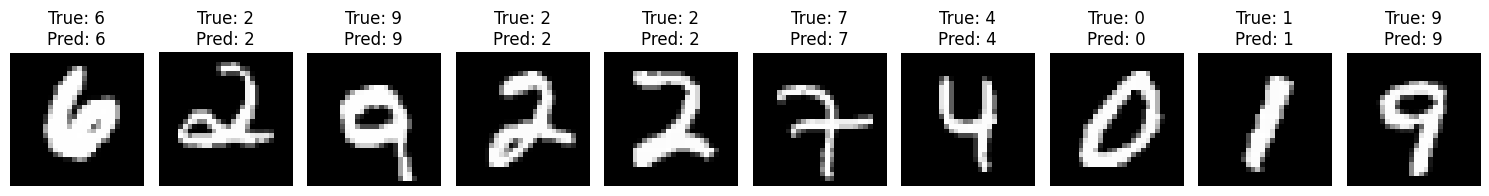

In [4]:

def build_model(input_shape, filters):
    rank = 3
    input_layer = Input(shape=input_shape)
    x = input_layer

    x = Conv2D(filters, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128)(x)
    
    h1 = H1Layer()
    h2 = H2Layer(h1)
    h3 = H3Layer(h1, h2)
    h4 = H4Layer(h2, h3)
    
    x = h2(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = h3(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = h4(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 

# Load and preprocess the MNIST data
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (28, 28, 1)
filters = 64
model_mnist = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_mnist.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model_mnist.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_mnist.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_mnist.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()

# 10 EPOCHS - Validation Accuracy: 0.97

# MNIST Prediction
## Our method / Batch Normalization
* 128 Neurons per Dense layer 
* Lr: 0.001
* Batch Size: 64
* Epochs: 10

Epoch 1/10
938/938 [==============================] - 7s 5ms/step - loss: 0.1731 - accuracy: 0.9521 - val_loss: 126.4041 - val_accuracy: 0.0485
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0562 - accuracy: 0.9837 - val_loss: 1.7022 - val_accuracy: 0.7331
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 2.0391 - val_accuracy: 0.5699
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 7.3185 - val_accuracy: 0.3963
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.1823 - val_accuracy: 0.9512
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0694 - val_accuracy: 0.9804
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 2.5323 - val_accuracy: 0.8548
Epoc

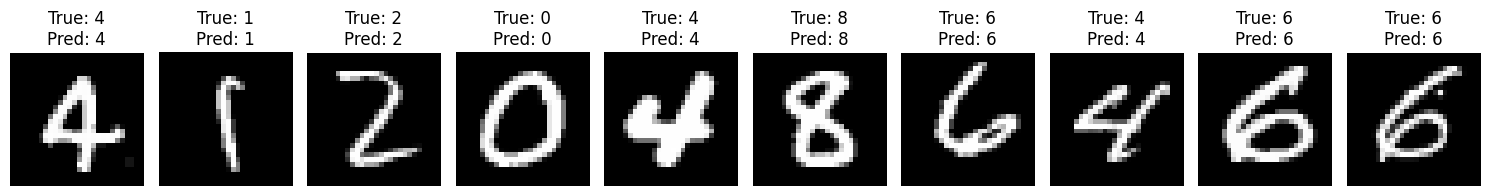

In [3]:

def build_model(input_shape, filters):
    rank = 3
    input_layer = Input(shape=input_shape)
    x = input_layer

    x = Conv2D(filters, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128)(x)
    
    h1 = H1Layer()
    h2 = H2Layer(h1)
    h3 = H3Layer(h1, h2)
    h4 = H4Layer(h2, h3)
    
    x = h2(x)
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = h3(x)
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = h4(x)
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 

# Load and preprocess the MNIST data
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (28, 28, 1)
filters = 64
model_mnist = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_mnist.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model_mnist.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_mnist.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_mnist.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()

# 10 EPOCHS - Validation Accuracy: 0.98

# MNIST Prediction
## 4 layers Deep Network with ReLU Activation Function. 
* 128 Neurons per Dense layer 
* Lr: 0.001
* Batch Size: 64
* Epochs: 10

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.1468 - accuracy: 0.9556 - val_loss: 0.0871 - val_accuracy: 0.9718
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0572 - accuracy: 0.9820 - val_loss: 0.0582 - val_accuracy: 0.9833
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0528 - val_accuracy: 0.9843
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0553 - val_accuracy: 0.9839
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0491 - val_accuracy: 0.9859
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0720 - val_accuracy: 0.9818
Epoch 

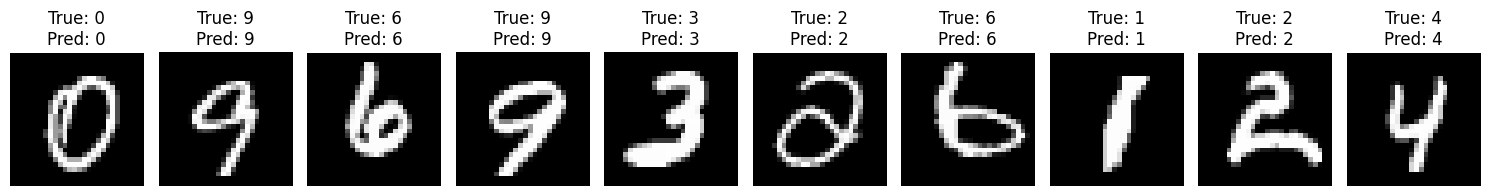

In [4]:

def build_model(input_shape, filters):
    input_layer = Input(shape=input_shape)
    x = input_layer
    x = Conv2D(filters, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(128, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation="relu")(x)
    x = BatchNormalization()(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 

# Load and preprocess the MNIST data
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (28, 28, 1)
filters = 64
model_mnist = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_mnist.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model_mnist.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_mnist.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_mnist.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()

# 10 EPOCHS - Validation Accuracy: 0.98

# MNIST Prediction
## 4 layers Deep Network Sigmoid Activation Function
* 128 Neurons per Dense layer 
* Lr: 0.001
* Batch Size: 64
* Epochs: 10

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.3031 - accuracy: 0.9090 - val_loss: 25.8422 - val_accuracy: 0.0980
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2001 - accuracy: 0.9388 - val_loss: 16.7428 - val_accuracy: 0.1032
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6354 - accuracy: 0.7570 - val_loss: 15.6556 - val_accuracy: 0.0982
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 1.3226 - accuracy: 0.4628 - val_loss: 27.7686 - val_accuracy: 0.1001
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 1.2756 - accuracy: 0.4875 - val_loss: 25.3597 - val_accuracy: 0.0982
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 1.2592 - accuracy: 0.5001 - val_loss: 29.2942 - val_accuracy: 0.0958
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 1.2358 - accuracy: 0.5115 - val_loss: 21.7584 - val_accuracy: 0.0958

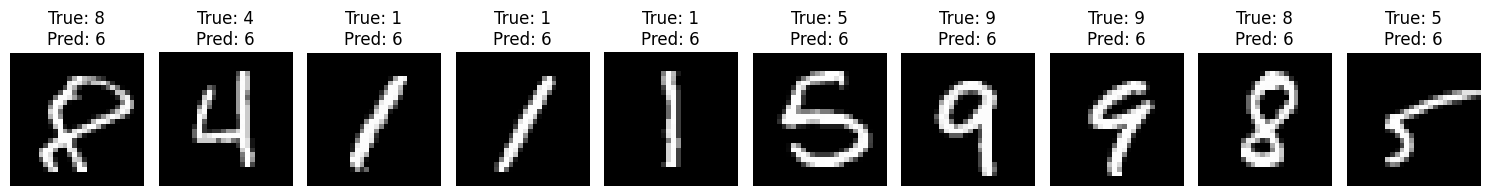

In [5]:

def build_model(input_shape, filters):
    input_layer = Input(shape=input_shape)
    x = input_layer
    x = Conv2D(filters, (3, 3), activation='sigmoid')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation="sigmoid")(x)
    x = Dense(128, activation="sigmoid")(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation="sigmoid")(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation="sigmoid")(x)
    x = BatchNormalization()(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 

# Load and preprocess the MNIST data
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (28, 28, 1)
filters = 64
model_mnist = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_mnist.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model_mnist.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_mnist.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_mnist.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()

# 10 EPOCHS - Validation Accuracy: 0.09

# MNIST Prediction
## 4 layers Deep Network,  Tanh Activation Function.
* 128 Neurons per Dense layer 
* Lr: 0.001
* Batch Size: 64
* Epochs: 10

In [6]:

def build_model(input_shape, filters):
    input_layer = Input(shape=input_shape)
    x = input_layer
    x = Conv2D(filters, (3, 3), activation='tanh')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation="tanh")(x)
    x = Dense(128, activation="tanh")(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation="tanh")(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation="tanh")(x)
    x = BatchNormalization()(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 

# Load and preprocess the MNIST data
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (28, 28, 1)
filters = 64
model_mnist = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_mnist.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model_mnist.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_mnist.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_mnist.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.1698 - accuracy: 0.9483 - val_loss: 0.0944 - val_accuracy: 0.9698
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0791 - accuracy: 0.9757 - val_loss: 0.1062 - val_accuracy: 0.9671
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0559 - accuracy: 0.9823 - val_loss: 0.1084 - val_accuracy: 0.9691
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0448 - accuracy: 0.9854 - val_loss: 0.0686 - val_accuracy: 0.9782
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0974 - val_accuracy: 0.9709
Epoch 6/10
245/938 [======>.......................] - ETA: 2s - loss: 0.0255 - accuracy: 0.9915

KeyboardInterrupt: 

# 10 EPOCHS - Validation Accuracy: 0.97

# Mnist Prediction Relu + Decomposition

2023-10-30 16:47:40.182223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 16:47:40.198168: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 16:47:40.198347: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/10


2023-10-30 16:47:42.519385: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-30 16:47:43.038263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-30 16:47:43.040149: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f855b419ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-30 16:47:43.040160: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2023-10-30 16:47:43.043327: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-30 16:47:43.141111: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.

938/938 [==============================] - 7s 4ms/step - loss: 0.7822 - accuracy: 0.7128 - val_loss: 0.2525 - val_accuracy: 0.9481
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1919 - accuracy: 0.9547 - val_loss: 0.2055 - val_accuracy: 0.9647
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1140 - accuracy: 0.9717 - val_loss: 0.1684 - val_accuracy: 0.9614
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0733 - accuracy: 0.9798 - val_loss: 0.1562 - val_accuracy: 0.9748
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0562 - accuracy: 0.9842 - val_loss: 0.1879 - val_accuracy: 0.9756
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0439 - accuracy: 0.9875 - val_loss: 0.1585 - val_accuracy: 0.9783
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0358 - accuracy: 0.9906 - val_loss: 0.1419 - val_accuracy: 0.9776
Epoch 8/10
938/93

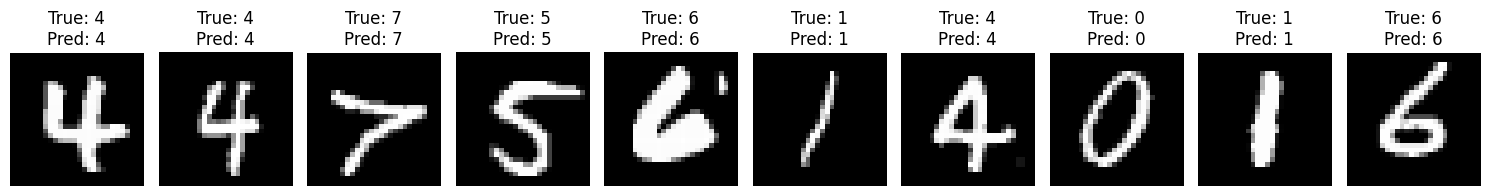

In [2]:

def build_model(input_shape, filters):
    rank = 3
    input_layer = Input(shape=input_shape)
    x = input_layer
    x = Conv2D(filters, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128)(x)

    x = Activation("relu")(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = Activation("relu")(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = Activation("relu")(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 

# Load and preprocess the MNIST data
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (28, 28, 1)
filters = 64
model_mnist = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_mnist.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model_mnist.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_mnist.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_mnist.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()

# Mnist Prediction Sigmoid + Decomposition

2023-10-30 17:07:57.876716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 17:07:57.894171: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 17:07:57.894362: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/10


2023-10-30 17:08:00.256553: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-30 17:08:00.802638: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-30 17:08:00.804215: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1cf67ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-30 17:08:00.804243: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2023-10-30 17:08:00.810223: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-30 17:08:00.908534: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 [==============================] - 7s 4ms/step - loss: 2.3020 - accuracy: 0.1091 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 8/10
938/93

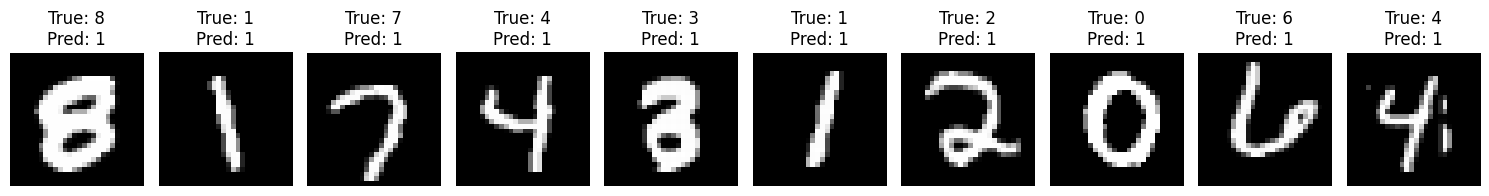

In [2]:

def build_model(input_shape, filters):
    rank = 3
    input_layer = Input(shape=input_shape)
    x = input_layer
    x = Conv2D(filters, (3, 3), activation='sigmoid')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128)(x)

    x = Activation("sigmoid")(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = Activation("sigmoid")(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = Activation("sigmoid")(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 

# Load and preprocess the MNIST data
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (28, 28, 1)
filters = 64
model_mnist = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_mnist.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model_mnist.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_mnist.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_mnist.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()

# 4 layers Deep Network,  Tanh Activation Function. 

2023-10-30 17:14:23.677510: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 17:14:23.694900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 17:14:23.695085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/10


2023-10-30 17:14:26.053668: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-30 17:14:26.567738: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-30 17:14:26.569810: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f99c6ca73f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-30 17:14:26.569822: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2023-10-30 17:14:26.572998: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-30 17:14:26.670517: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.

938/938 [==============================] - 7s 4ms/step - loss: 0.8187 - accuracy: 0.6931 - val_loss: 0.2717 - val_accuracy: 0.9399
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2386 - accuracy: 0.9435 - val_loss: 0.2931 - val_accuracy: 0.9123
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1616 - accuracy: 0.9587 - val_loss: 0.2045 - val_accuracy: 0.9580
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1201 - accuracy: 0.9682 - val_loss: 0.1885 - val_accuracy: 0.9605
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0896 - accuracy: 0.9747 - val_loss: 0.2184 - val_accuracy: 0.9630
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0751 - accuracy: 0.9794 - val_loss: 0.1935 - val_accuracy: 0.9689
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0618 - accuracy: 0.9824 - val_loss: 0.2010 - val_accuracy: 0.9656
Epoch 8/10
938/93

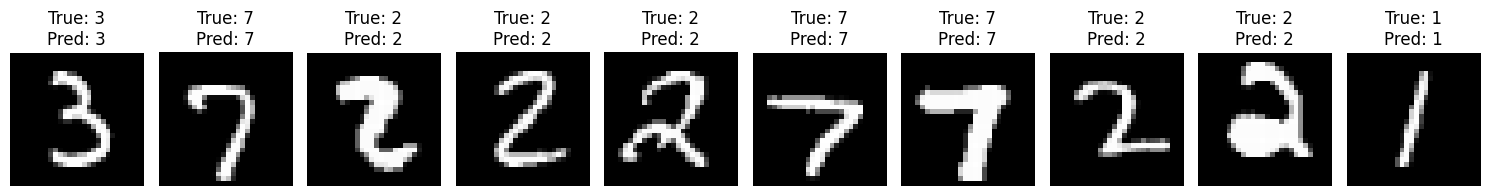

In [2]:

def build_model(input_shape, filters):
    rank = 3
    input_layer = Input(shape=input_shape)
    x = input_layer
    x = Conv2D(filters, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128)(x)

    x = Activation("tanh")(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = Activation("tanh")(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = Activation("tanh")(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 

# Load and preprocess the MNIST data
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (28, 28, 1)
filters = 64
model_mnist = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_mnist.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model_mnist.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_mnist.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_mnist.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()